# Setting up

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 64
version = 1

In [1]:
!pip install -Uqq fastai
!pip install nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.2 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

# Creating Data Loader


In [6]:
data_path="data"

In [ ]:
# Define the batch size
bs = 64

# Create a DataBlock with combined transformations
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128), RandomResizedCrop(224, min_scale=0.5)],  # Combine Resize and RandomResizedCrop
    batch_tfms=aug_transforms()  # Add additional augmentations
)

# Create DataLoaders
dls = dblock.dataloaders(data_path, bs=bs)
print(f"Number of training items: {len(dls.train_ds)}")


Number of training items: 9100


dyamn
dyamn
dyamn
dyamn


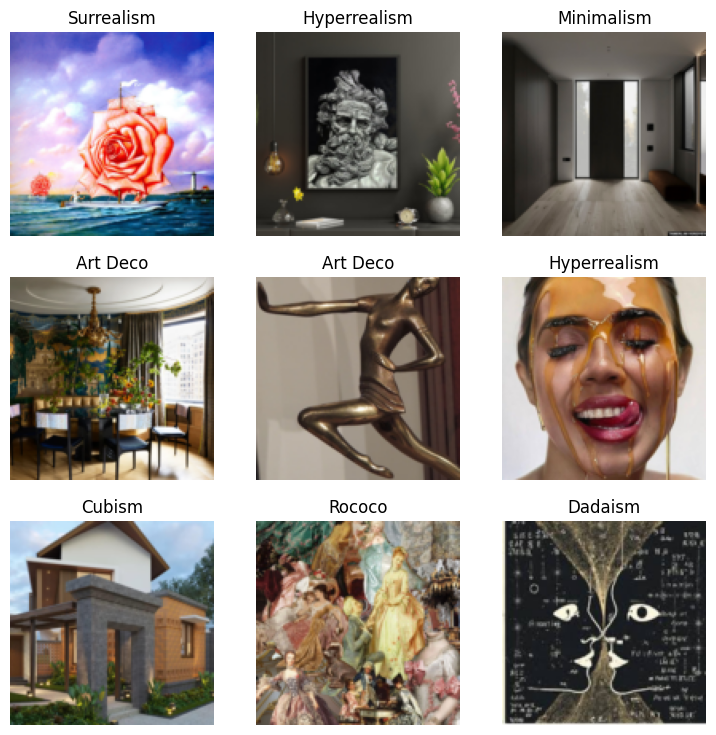

In [ ]:
# Check the DataLoaders
count = 0
while count != 10:
  try:
    dls.show_batch()
    break
  except Exception as e:
    print('dyamn')
  count+=1



In [ ]:
image_counts = get_image_files(data_path)
d={}
for image_path in image_counts:
  key = None
  i = str(image_path)
  if '/' in i:
    key = i.split('/')[1]
  if key == None:
    pass
  else:
    if key not in d.keys():
      d.update({key:1})
    else:
      d[key] += 1
print('images per catagory')
d


images per catagory


{'Art Nouveau': 655,
 'Art Deco': 672,
 'Avant-Garde': 662,
 'Bauhaus': 663,
 'Cubism': 643,
 'Dadaism': 572,
 'Futurism': 662,
 'Gothic Art': 684,
 'Minimalism': 667,
 'Surrealism': 713,
 'Hyperrealism': 689,
 'Impressionism': 696,
 'Neoclassicism Painting': 588,
 'Pop Art': 674,
 'Rococo': 686}

In [ ]:
doc(verify_images)

In [ ]:
failed = verify_images(image_counts[:10])

prev = 0
curr_idx = 100
while True:
  if len(image_counts)-curr_idx <= 100:
    print('breaking condition')
    failed +=  verify_images(image_counts[prev:])
    print(len(failed))
    break
  else:
    print(f"verifying till {curr_idx}/{len(image_counts)}")
    failed +=  verify_images(image_counts[prev:curr_idx])
    print(len(failed))
    prev = curr_idx
    curr_idx+=100

failed

verifying till 100/10111
7
verifying till 200/10111
21
verifying till 300/10111
25
verifying till 400/10111
32
verifying till 500/10111
32
verifying till 600/10111
32
verifying till 700/10111
33
verifying till 800/10111
41
verifying till 900/10111
44
verifying till 1000/10111
51
verifying till 1100/10111
54
verifying till 1200/10111
54
verifying till 1300/10111
54
verifying till 1400/10111
54
verifying till 1500/10111
56
verifying till 1600/10111
57
verifying till 1700/10111
58
verifying till 1800/10111
59
verifying till 1900/10111
59
verifying till 2000/10111
59
verifying till 2100/10111
60
verifying till 2200/10111
60
verifying till 2300/10111
63
verifying till 2400/10111
66
verifying till 2500/10111
66
verifying till 2600/10111
66
verifying till 2700/10111
66
verifying till 2800/10111
70
verifying till 2900/10111
73
verifying till 3000/10111
82
verifying till 3100/10111
85
verifying till 3200/10111
85
verifying till 3300/10111
85
verifying till 3400/10111
87
verifying till 3500/1011

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


170
verifying till 9600/10111
176
verifying till 9700/10111
182
verifying till 9800/10111
185
verifying till 9900/10111
185
verifying till 10000/10111
185
breaking condition
185


(#185) [Path('data/Art Nouveau/113617c0-2ca9-4ca0-a651-af38bc703c1c.jpg'),Path('data/Art Nouveau/90c6d463-a35b-4ac3-a06b-22b5225b0715.jpg'),Path('data/Art Nouveau/da2294d9-979a-477c-b595-8e6ecae24e73.jpg'),Path('data/Art Nouveau/5d5016ab-4ca1-4cd7-a345-e9b77de715bf.jpg'),Path('data/Art Nouveau/3e9963e0-5b8e-4f81-bc7a-9c68ea074e9d.jpg'),Path('data/Art Nouveau/e3c348b2-c63a-43a5-8df5-453a971658c8.jpg'),Path('data/Art Nouveau/9c321f17-46cc-47a7-9a27-87272a9c456c.jpg'),Path('data/Art Nouveau/12007185-7970-4411-a7ea-1ac1d899e58e.jpg'),Path('data/Art Nouveau/14e1cf65-6e75-4f0c-bfeb-608f9967305b.jpg'),Path('data/Art Nouveau/c6037c19-0708-41fb-81b2-30328f1628a6.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#185) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
failed

(#185) [Path('data/Art Nouveau/113617c0-2ca9-4ca0-a651-af38bc703c1c.jpg'),Path('data/Art Nouveau/90c6d463-a35b-4ac3-a06b-22b5225b0715.jpg'),Path('data/Art Nouveau/da2294d9-979a-477c-b595-8e6ecae24e73.jpg'),Path('data/Art Nouveau/5d5016ab-4ca1-4cd7-a345-e9b77de715bf.jpg'),Path('data/Art Nouveau/3e9963e0-5b8e-4f81-bc7a-9c68ea074e9d.jpg'),Path('data/Art Nouveau/e3c348b2-c63a-43a5-8df5-453a971658c8.jpg'),Path('data/Art Nouveau/9c321f17-46cc-47a7-9a27-87272a9c456c.jpg'),Path('data/Art Nouveau/12007185-7970-4411-a7ea-1ac1d899e58e.jpg'),Path('data/Art Nouveau/14e1cf65-6e75-4f0c-bfeb-608f9967305b.jpg'),Path('data/Art Nouveau/c6037c19-0708-41fb-81b2-30328f1628a6.jpg')...]

In [ ]:
bs = 64

# Create a DataBlock with combined transformations
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128), RandomResizedCrop(224, min_scale=0.5)],  # Combine Resize and RandomResizedCrop
    batch_tfms=aug_transforms()  # Add additional augmentations
)

# Create DataLoaders
dls = dblock.dataloaders(data_path, bs=bs)
print(f"Number of training items: {len(dls.train_ds)}")

Number of training items: 8934


In [ ]:
torch.save(dls, f'art_dataloader_{version}.pk1')

In [7]:
dls = torch.load(f'art_dataloader_{version-1}.pk1')

<ipython-input-7-f8e9f4fbf673>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dls = torch.load(f'art_dataloader_{version-1}.pk1')


In [8]:
dls.train.vocab

['Art Deco', 'Art Nouveau', 'Avant-Garde', 'Bauhaus', 'Cubism', 'Dadaism', 'Futurism', 'Gothic Art', 'Hyperrealism', 'Impressionism', 'Minimalism', 'Neoclassicism Painting', 'Pop Art', 'Rococo', 'Surrealism']

# Prepare Model

In [ ]:
model_path = "models"

In [ ]:
# model.load(f"{model_path}/cap-recognizer-v{version-1}")

In [ ]:
# model = vision_learner(dls, resnet34, metrics = [error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 46.0MB/s]


In [ ]:
from fastai.callback.tracker import EarlyStoppingCallback

# Create your learner
model = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

# Add the EarlyStoppingCallback
callbacks = [EarlyStoppingCallback(monitor='accuracy', patience=3)]

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 128MB/s]


In [ ]:


# Fine-tune the model with the callback
model.fine_tune(5, cbs=callbacks)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 160MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.366458,1.496354,0.439516,0.560484,04:05


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.710181,1.256664,0.369960,0.630040,04:15
1,1.454270,1.190633,0.340726,0.659274,04:18
2,1.165007,1.136388,0.314516,0.685484,04:14
3,0.907327,1.057403,0.300403,0.699597,04:13
4,0.763317,1.047475,0.283266,0.716734,04:17


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should b

In [ ]:
model.save(f"art-recognizer-v{version}")

Path('models/art-recognizer-v0.pth')

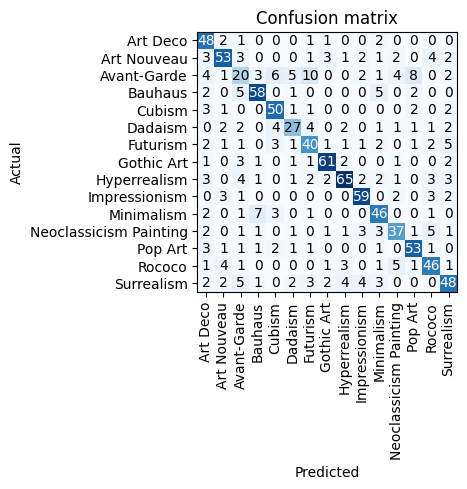

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

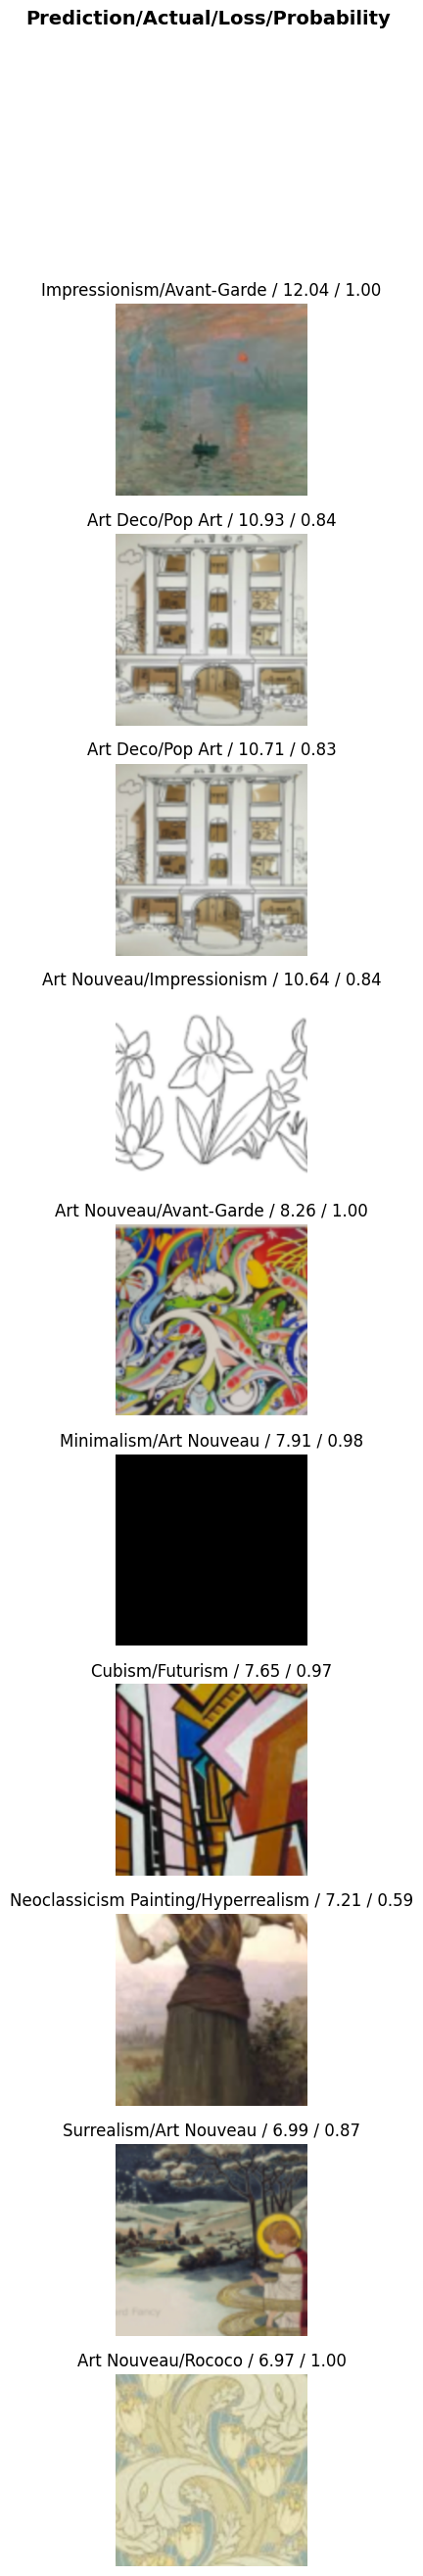

In [ ]:
interp.plot_top_losses(10, nrows=10)

In [ ]:
(len(dls.valid)+len(dls.train))*64

In [ ]:
model.export(f"{model_path}/art-recognizer-v{version}.pk1")